# Predictive Model for California Housing Prices

## Loading the Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'E:\Projects\ML Projects\01\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## Data Cleaning and Preprocessing

In [8]:
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [10]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building and Training the Model

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test_scaled)

## Evaluating the Model

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error for interpretability
r2 = r2_score(y_test, y_pred)

In [15]:
print(f"Root Mean Squared Error: ${rmse:.2f}")

Root Mean Squared Error: $70060.52


In [16]:
print(f"R² Score: {r2:.2f}")

R² Score: 0.63


## Visualizing the Results

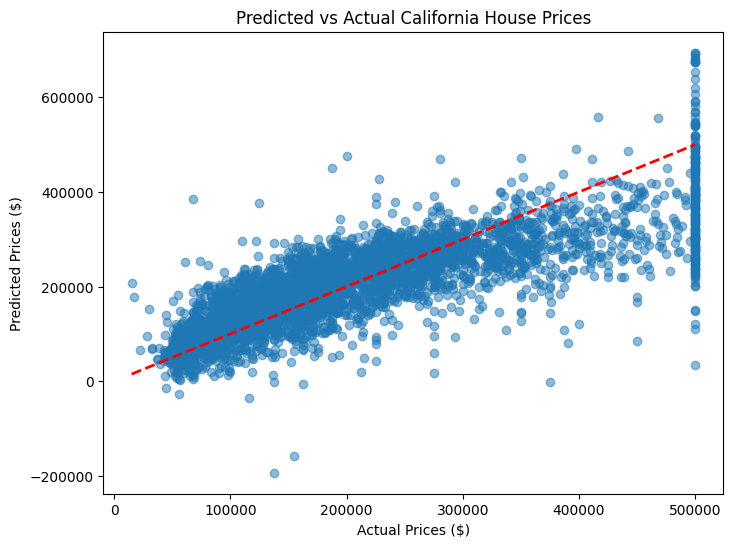

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Predicted vs Actual California House Prices')
plt.savefig('pred_vs_actual.png')
plt.show()